# importing data

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("heart_data.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
print(data.shape)

(4238, 16)


### a summary of statistics pertaining to the DataFrame columns

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### checking for null values

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#total missing values in data

missing_data = data.isnull().sum()
print(sum(missing_data))

645


In [9]:
#total percentage of missing data

total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.22%


In [10]:
# percentage of missing data per category

total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


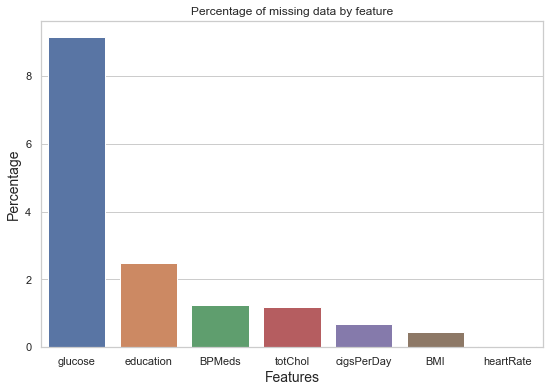

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 9.15%, the blood glucose entry has the highest percentage of missing data. Other features have very few missing entries.
Since the missing entries account for only 15.22% of the total data we can drop these entries without losing alot of data.

## Drop missing entries

In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
print(data.shape)

(3656, 16)


In [15]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## data distribution

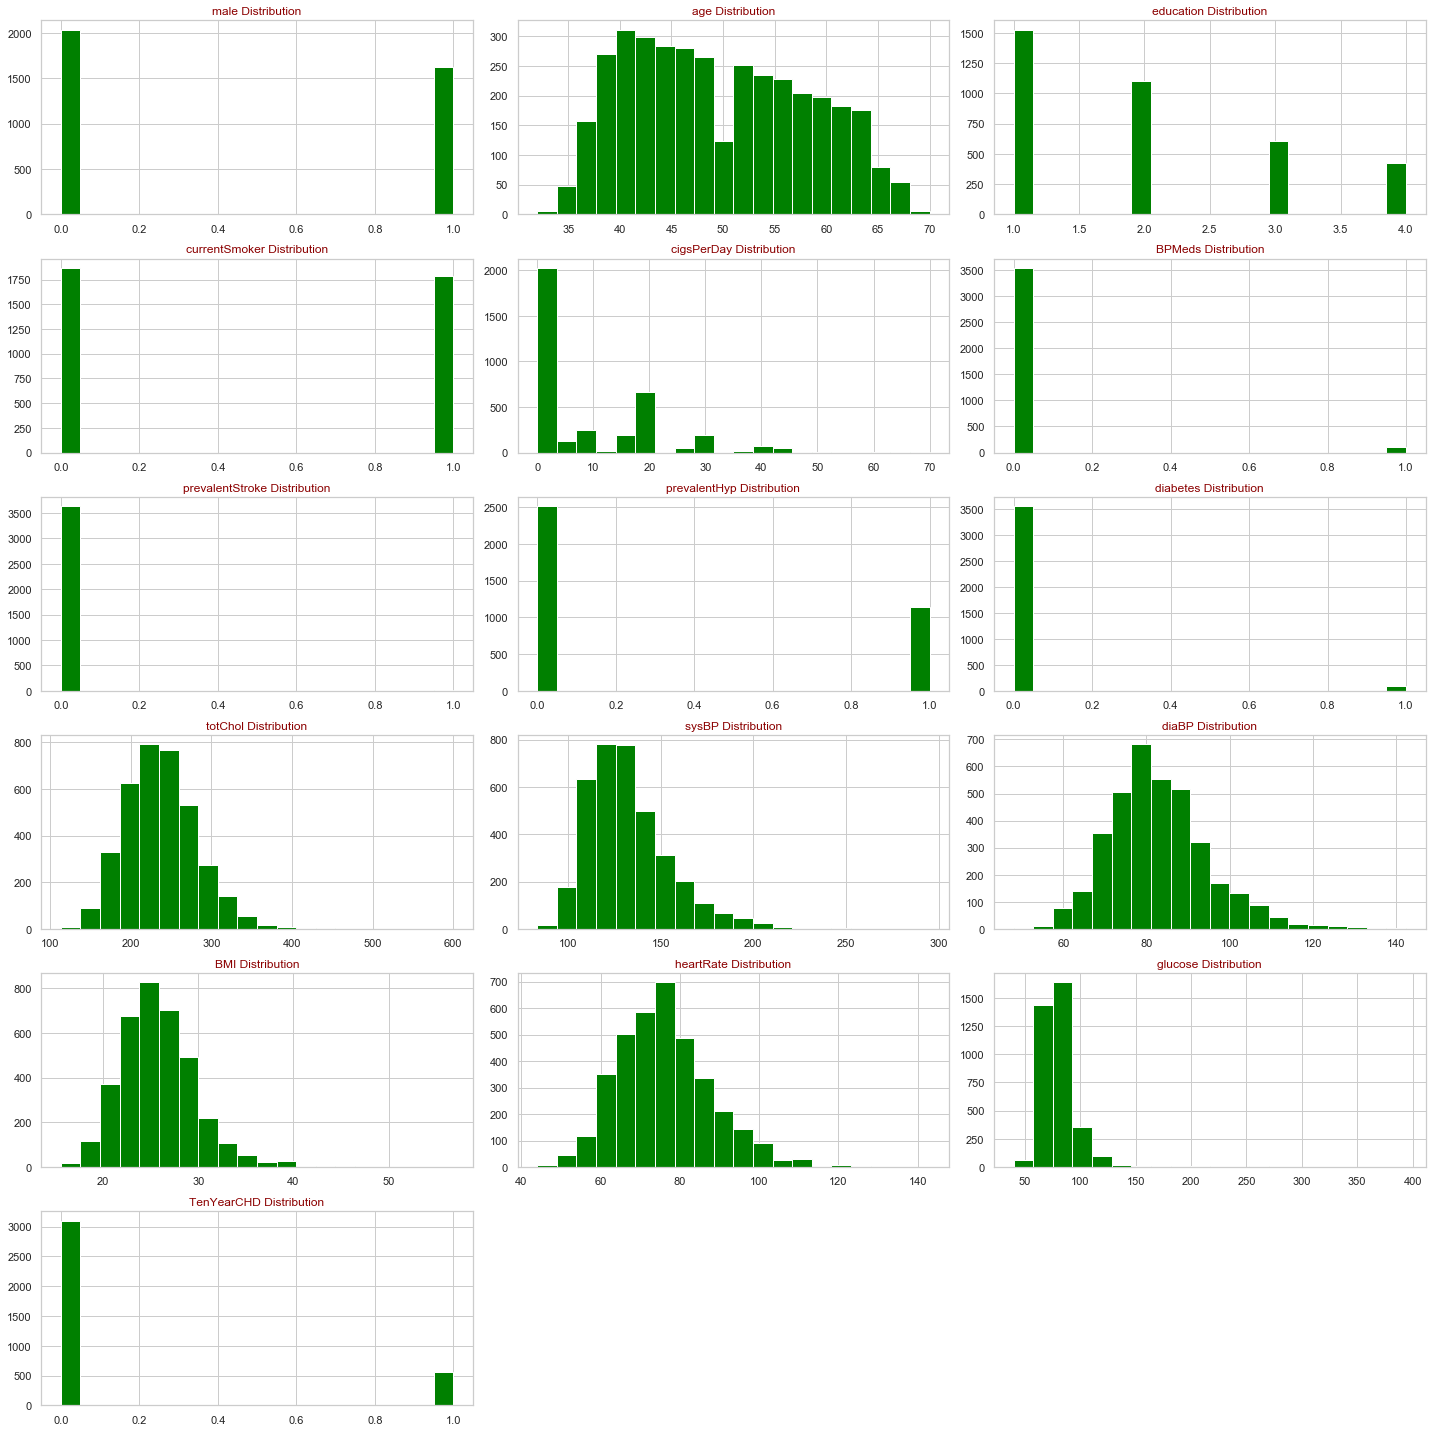

In [16]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
        
draw_histograms(data,data.columns,6,3)

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced

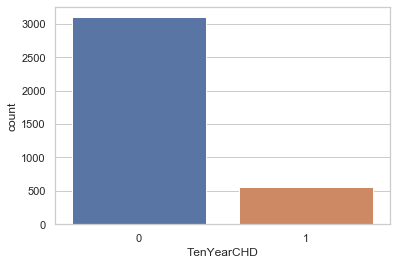

In [17]:
#TenYearCHD distribution 

import seaborn as sn

data.TenYearCHD.value_counts()
sn.countplot(x='TenYearCHD',data=data)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.
The data is not properly balanced as the number of people without the disease greately exceeds the number of people with the disease. The ratio is about 1:5.57

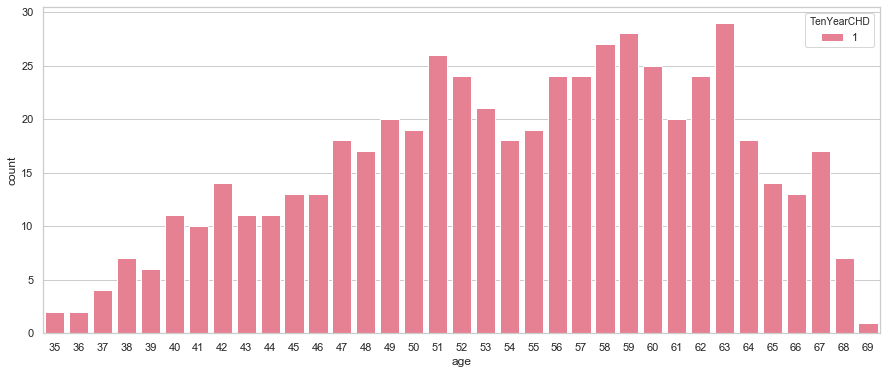

In [18]:
#Number of people who have disease vs age

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

positive_cases = data[data['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63.
The number of sick people generally increases with age

# Feature Selection

In [19]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [20]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)#define the features

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=28, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x1D147FC5268,
                                          verbose=0, warm_start=False),
         max_iter=100, n

In [21]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

Age and systolic blood pressures are selected as the most important features for predicting the Ten year risk of developing CHD.

In [22]:
# select the top 10 features
top_features = data.columns[:-1][feat_selector.ranking_ <10].tolist()
top_features

['age',
 'education',
 'cigsPerDay',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [23]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

In [24]:
# select the top 5 features
top_features = data.columns[:-1][feat_selector.ranking_ <5].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

### Dividing data for training and testing

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

# Scikit Learn - Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\Pratiksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#### model accuracy
import sklearn

logistic_accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
print(logistic_accuracy)

0.855191256830601


In [28]:
#Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.921007,0.078993
1,0.967173,0.032827
2,0.792055,0.207945
3,0.813701,0.186299
4,0.847727,0.152273


# Support Vector Machine

In [29]:
from sklearn.svm import SVC

In [30]:
#grid search for optimum parameters
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [31]:
# train the model
svm_clf.fit(x_train,y_train)
svm_clf.best_params_ 

{'C': 0.001, 'gamma': 0.001}

In [32]:
# predictions
svm_predict = svm_clf.predict(x_test)

In [33]:
#accuracy

from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test,svm_predict)
print(svm_accuracy)

0.8510928961748634


# Quadratic Discriminant Analysis

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [35]:
clf = QuadraticDiscriminantAnalysis()

In [36]:
clf.fit(x_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [37]:
QDA_predict = clf.predict(x_test)

In [38]:
QDA_accuracy = accuracy_score(y_test,QDA_predict)
print(QDA_accuracy)

0.8292349726775956


## Model Comparison

In [39]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':logistic_accuracy },
    "Support vector machine":{'Accuracy':svm_accuracy},
    "Quadratic Discriminant Analysis":{'Accuracy':QDA_accuracy}
}).T


In [40]:
comparison

,Accuracy
Logistic regression,0.855191
Support vector machine,0.851093
Quadratic Discriminant Analysis,0.829235


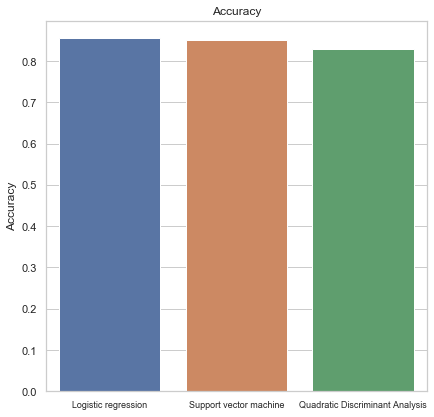

In [41]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()